# Feature Engineering

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [135]:
def target_rel(df, feature, feature_title):
    
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Arrival Delay by {feature_title}')

    sns.barplot(ax=axes[0], data=df, x=feature, y='arr_delay')
    sns.stripplot(ax=axes[1], data=df,x=feature, y='arr_delay')

In [136]:
# get the cleaned dataset

import pickle

with open(r'..\data\flight_data.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [137]:
# get the test features that any engineered features must be linked to

df_test_features = pd.read_csv(r'..\csvs\test_features.csv', sep=',')

In [138]:
test_feat = list(df_test_features.columns)

In [139]:
# select only the test features and the target from the training dataset

df_flights = pd.concat([df_flights[test_feat], df_flights['arr_delay']],axis=1)

In [10]:
# use this to get year / month / day from fl_date on test set

df_test_features['fl_date_new'] = pd.to_datetime(df_test_features['fl_date'], unit='ms')
df_test_features['year'] = df_test_features['fl_date_new'].dt.year
df_test_features['month'] = df_test_features['fl_date_new'].dt.month
df_test_features['day'] = df_test_features['fl_date_new'].dt.day
df_test_features.tail()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
5  1577865600000                 WN                 WN          WN   
6  1577865600000                 WN                 WN          WN   
7  1577865600000                 WN                 WN          WN   
8  1577865600000                 WN                 WN          WN   
9  1577865600000                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
5                5684                WN   N7856A               5684   
6                6152                WN   N7735A               6152   
7                1679                WN   N405WN               1679   
8                3479                WN   N489WN               3479   
9                4069                WN   N7708E               4069   

   origin_airport_id origin  ... crs_dep_time  crs_arr_time dup  \
5              13891    ONT  ...          600           715   N   
6              13891    ONT  ...         1620          1740   N   
7              13891    ONT  ...         1505          1630   N   
8              13891    ONT  ...         1230          1355   N   
9              13891    ONT  ...          740           900   N   

  crs_elapsed_time  flights  distance         fl_date_new  year  month  day  
5               75        1       333 2020-01-01 08:00:00  2020      1    1  
6               80        1       333 2020-01-01 08:00:00  2020      1    1  
7               85        1       390 2020-01-01 08:00:00  2020      1    1  
8               85        1       390 2020-01-01 08:00:00  2020      1    1  
9               80        1       390 2020-01-01 08:00:00  2020      1    1  

[5 rows x 24 columns]

# Round 1

### Mean/Median Monthly Arrival Delay and Arr_Delay

In [11]:
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])
df_flights['year'] = df_flights['fl_date'].dt.year
df_flights['month'] = df_flights['fl_date'].dt.month
df_flights['day'] = df_flights['fl_date'].dt.day

In [12]:
## look at correlation between month and arr_delay

mean_arr_delay = df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='mean_arr_delay', ascending=False)
mean_arr_delay.set_index('month',inplace=True)
mean_arr_delay = mean_arr_delay.T
mean_arr_delay

month                  8          6         7         5         2        12  \
mean_arr_delay  10.135397  10.120094  8.901098  6.805443  6.587885  6.06855   

month                 4         3         10        1         11        9   
mean_arr_delay  5.382526  2.893273  2.466155  2.297154  2.229622  0.508462

In [13]:
month_dict = mean_arr_delay.to_dict('records')

In [14]:
month_dict

[{8: 10.135397157651207,
  6: 10.120094007050529,
  7: 8.901097631426921,
  5: 6.805443276744812,
  2: 6.5878846686997505,
  12: 6.068549859978083,
  4: 5.3825262618498595,
  3: 2.8932732468674436,
  10: 2.46615507960142,
  1: 2.2971539456662353,
  11: 2.2296219216094344,
  9: 0.5084617327607982}]

In [15]:
df_flights['mean_arr_delay'] = df_flights['month'].map(month_dict[0])

In [16]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... crs_arr_time  dup crs_elapsed_time flights  \
0              12889    LAS  ...         2350    N              140       1   
1              12889    LAS  ...          155    N              150       1   
2              12889    LAS  ...         1120    N              150       1   
3              12889    LAS  ...          830    N               55       1   
4              12889    LAS  ...         1835    N               55       1   

   distance  arr_delay  year  month  day  mean_arr_delay  
0       986       19.0  2018      1    1        2.297154  
1      1099       46.0  2018      1    1        2.297154  
2      1099       -9.0  2018      1    1        2.297154  
3       197       -3.0  2018      1    1        2.297154  
4       197       37.0  2018      1    1        2.297154  

[5 rows x 25 columns]

In [17]:
df_flights['arr_delay'].corr(df_flights['mean_arr_delay'])

0.0658661713996643

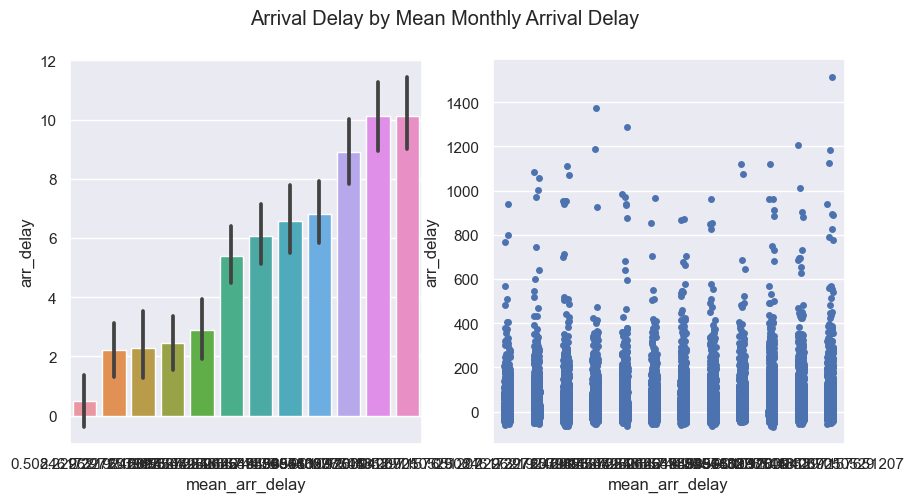

In [18]:
target_rel(df_flights, feature='mean_arr_delay', feature_title='Mean Monthly Arrival Delay')

In [19]:
# get median monthly arrival delay

median_arr_delay = df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='median_arr_delay', ascending=False)
median_arr_delay.set_index('month',inplace=True)
median_arr_delay = median_arr_delay.T
median_arr_delay

month              5    6    7    8    12   2    4    11   3    10   1    9 
median_arr_delay -5.0 -5.0 -5.0 -5.0 -5.0 -6.0 -6.0 -6.0 -7.0 -7.0 -8.0 -8.0

In [20]:
month_dict = median_arr_delay.to_dict('records')

In [21]:
df_flights['median_arr_delay'] = df_flights['month'].map(month_dict[0])
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... dup  crs_elapsed_time flights distance  \
0              12889    LAS  ...   N               140       1      986   
1              12889    LAS  ...   N               150       1     1099   
2              12889    LAS  ...   N               150       1     1099   
3              12889    LAS  ...   N                55       1      197   
4              12889    LAS  ...   N                55       1      197   

   arr_delay  year month  day  mean_arr_delay  median_arr_delay  
0       19.0  2018     1    1        2.297154              -8.0  
1       46.0  2018     1    1        2.297154              -8.0  
2       -9.0  2018     1    1        2.297154              -8.0  
3       -3.0  2018     1    1        2.297154              -8.0  
4       37.0  2018     1    1        2.297154              -8.0  

[5 rows x 26 columns]

In [22]:
df_flights['arr_delay'].corr(df_flights['median_arr_delay'])

0.05691698369021277

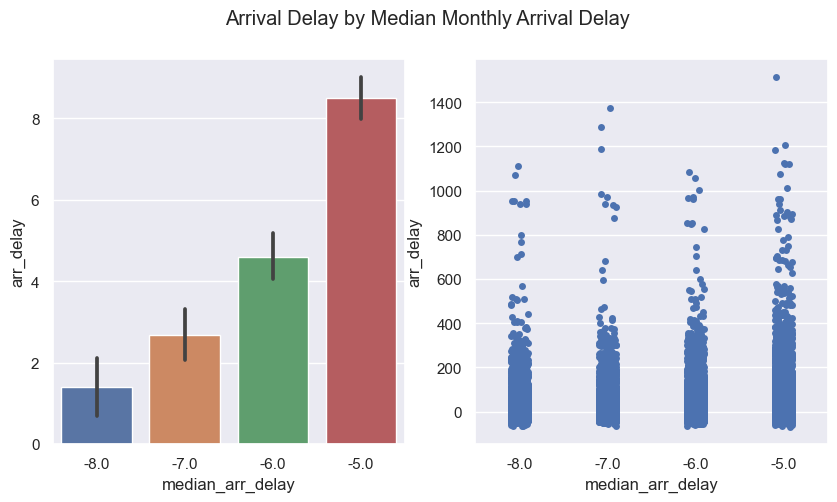

In [23]:
target_rel(df_flights, feature='median_arr_delay', feature_title='Median Monthly Arrival Delay')

### Season and Arr_Delay

In [24]:
## look at relationship between season and arr_delay

season_dict = {
    1:'Winter',
    2:'Winter',
    3:'Spring',
    4:'Spring',
    5:'Spring',
    6:'Summer',
    7:'Summer',
    8:'Summer',
    9:'Fall',
    10:'Fall',
    11:'Fall',
    12:'Winter'}
df_flights["season"] = df_flights["month"].map(season_dict)


In [25]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... crs_elapsed_time  flights distance arr_delay  \
0              12889    LAS  ...              140        1      986      19.0   
1              12889    LAS  ...              150        1     1099      46.0   
2              12889    LAS  ...              150        1     1099      -9.0   
3              12889    LAS  ...               55        1      197      -3.0   
4              12889    LAS  ...               55        1      197      37.0   

   year  month day  mean_arr_delay  median_arr_delay  season  
0  2018      1   1        2.297154              -8.0  Winter  
1  2018      1   1        2.297154              -8.0  Winter  
2  2018      1   1        2.297154              -8.0  Winter  
3  2018      1   1        2.297154              -8.0  Winter  
4  2018      1   1        2.297154              -8.0  Winter  

[5 rows x 27 columns]

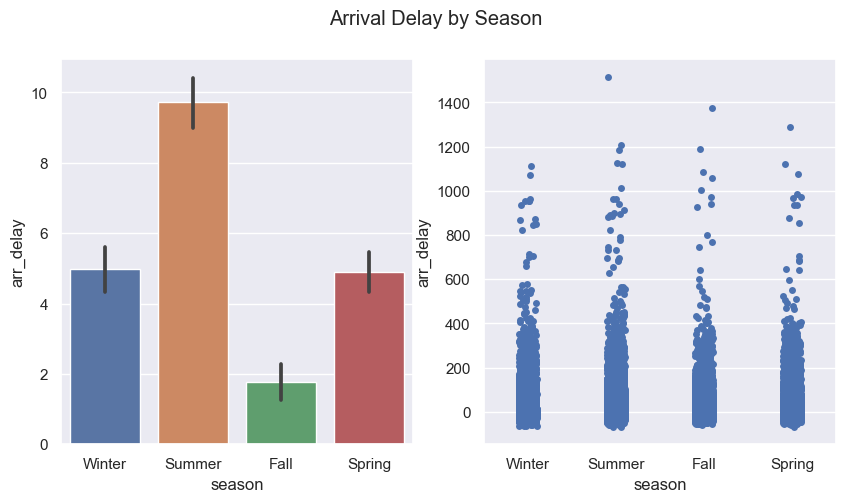

In [26]:
target_rel(df_flights, feature='season', feature_title='Season')

### Day of Week and Arr_Delay

In [27]:
# see if there's a relationship between day of week and arr_delay

# df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])

In [28]:
df_flights['day_of_week'] = df_flights['fl_date'].dt.day_name()

In [29]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... flights  distance arr_delay  year  month  \
0              12889    LAS  ...       1       986      19.0  2018      1   
1              12889    LAS  ...       1      1099      46.0  2018      1   
2              12889    LAS  ...       1      1099      -9.0  2018      1   
3              12889    LAS  ...       1       197      -3.0  2018      1   
4              12889    LAS  ...       1       197      37.0  2018      1   

   day mean_arr_delay  median_arr_delay  season  day_of_week  
0    1       2.297154              -8.0  Winter       Monday  
1    1       2.297154              -8.0  Winter       Monday  
2    1       2.297154              -8.0  Winter       Monday  
3    1       2.297154              -8.0  Winter       Monday  
4    1       2.297154              -8.0  Winter       Monday  

[5 rows x 28 columns]

In [30]:
target_rel(df_flights, feature='day_of_week', feature_title='Day of Week')

### Weekday/Weekend and Arr_Delay

In [31]:
df_flights["is_weekend"] = df_flights['fl_date'].dt.dayofweek > 4

In [32]:
df_flights[['day_of_week','is_weekend']].groupby(['day_of_week','is_weekend']).count()

Empty DataFrame
Columns: []
Index: [(Friday, False), (Monday, False), (Saturday, True), (Sunday, True), (Thursday, False), (Tuesday, False), (Wednesday, False)]

In [33]:
target_rel(df_flights, feature='is_weekend', feature_title='Weekday vs. Weekend')

### Holidays and Arr_Delay

In [34]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df_flights['is_holiday'] = df_flights['fl_date'].isin(holidays)
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... arr_delay  year month day  mean_arr_delay  \
0              12889    LAS  ...      19.0  2018     1   1        2.297154   
1              12889    LAS  ...      46.0  2018     1   1        2.297154   
2              12889    LAS  ...      -9.0  2018     1   1        2.297154   
3              12889    LAS  ...      -3.0  2018     1   1        2.297154   
4              12889    LAS  ...      37.0  2018     1   1        2.297154   

   median_arr_delay  season  day_of_week  is_weekend  is_holiday  
0              -8.0  Winter       Monday       False        True  
1              -8.0  Winter       Monday       False        True  
2              -8.0  Winter       Monday       False        True  
3              -8.0  Winter       Monday       False        True  
4              -8.0  Winter       Monday       False        True  

[5 rows x 30 columns]

In [35]:
target_rel(df_flights, feature='is_holiday', feature_title='Normal Day vs. Holiday')

### Departure Time of Day and Arr_Delay

In [36]:
# look at relationship between departure time of day and arr_delay

df_flights['crs_dep_time'] = df_flights['crs_dep_time'].astype(int)

In [37]:
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H%M', errors = 'coerce')
df_flights['crs_dep_time_hour'] = df_flights['crs_dep_time'].dt.hour

In [38]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_dep_time_of_day'] = pd.cut(df_flights['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [39]:
df_flights.head(20)

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 WN                 WN          WN   
1  2018-01-01                 WN                 WN          WN   
2  2018-01-01                 WN                 WN          WN   
3  2018-01-01                 WN                 WN          WN   
4  2018-01-01                 WN                 WN          WN   
5  2018-01-01                 WN                 WN          WN   
6  2018-01-01                 WN                 WN          WN   
7  2018-01-01                 WN                 WN          WN   
8  2018-01-01                 WN                 WN          WN   
9  2018-01-01                 WN                 WN          WN   
10 2018-01-01                 WN                 WN          WN   
11 2018-01-01                 WN                 WN          WN   
12 2018-01-01                 WN                 WN          WN   
13 2018-01-01                 WN                 WN          WN   
14 2018-01-01                 WN                 WN          WN   
15 2018-01-01                 WN                 WN          WN   
16 2018-01-01                 WN                 WN          WN   
17 2018-01-01                 WN                 WN          WN   
18 2018-01-01                 WN                 WN          WN   
19 2018-01-01                 WN                 WN          WN   

    mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                 5431                WN   N291WN               5431   
1                  989                WN   N287WN                989   
2                 1664                WN   N751SW               1664   
3                 1106                WN   N704SW               1106   
4                 1559                WN   N423WN               1559   
5                 1683                WN   N221WN               1683   
6                 6083                WN   N7857B               6083   
7                  495                WN   N7720F                495   
8                 5488                WN   N777QC               5488   
9                 6078                WN   N489WN               6078   
10                6141                WN   N967WN               6141   
11                5937                WN   N7835A               5937   
12                 104                WN   N262WN                104   
13                 582                WN   N953WN                582   
14                 959                WN   N285WN                959   
15                 987                WN   N712SW                987   
16                1033                WN   N719SW               1033   
17                1079                WN   N8672F               1079   
18                1093                WN   N921WN               1093   
19                1110                WN   N961WN               1110   

    origin_airport_id origin  ... month  day mean_arr_delay median_arr_delay  \
0               12889    LAS  ...     1    1       2.297154             -8.0   
1               12889    LAS  ...     1    1       2.297154             -8.0   
2               12889    LAS  ...     1    1       2.297154             -8.0   
3               12889    LAS  ...     1    1       2.297154             -8.0   
4               12889    LAS  ...     1    1       2.297154             -8.0   
5               12889    LAS  ...     1    1       2.297154             -8.0   
6               12889    LAS  ...     1    1       2.297154             -8.0   
7               12889    LAS  ...     1    1       2.297154             -8.0   
8               12889    LAS  ...     1    1       2.297154             -8.0   
9               12889    LAS  ...     1    1       2.297154             -8.0   
10              12889    LAS  ...     1    1       2.297154             -8.0   
11              12889    LAS  ...     1    1       2.297154             -8.0   
12              12889    LAS  ...     1    1 

In [40]:
target_rel(df_flights, feature='crs_dep_time_of_day', feature_title='Departure Time of Day')

In [41]:
df_flights.loc[df_flights['crs_dep_time'].isna(), ['crs_dep_time']]

crs_dep_time
9472           NaT
17287          NaT
22730          NaT
25155          NaT
26211          NaT
26772          NaT
39621          NaT
45944          NaT
46870          NaT
49001          NaT
61431          NaT
62334          NaT
64893          NaT
70201          NaT
91457          NaT
97346          NaT
99504          NaT

In [42]:
df_flights.dropna(inplace=True)

In [43]:
df_flights.loc[df_flights['crs_dep_time'].isna(), ['crs_dep_time']]

Empty DataFrame
Columns: [crs_dep_time]
Index: []

### Arrival Time of Day and Arr_Delay

In [44]:
# look at relationship between arrival time of day and arr_delay

df_flights['crs_arr_time'] = df_flights['crs_arr_time'].astype(int)

In [45]:
df_flights['crs_arr_time'] = pd.to_datetime(df_flights['crs_arr_time'], format = '%H%M', errors = 'coerce')
df_flights['crs_arr_time_hour'] = df_flights['crs_arr_time'].dt.hour

In [46]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_arr_time_of_day'] = pd.cut(df_flights['crs_arr_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [47]:
df_flights.head(20)

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 WN                 WN          WN   
1  2018-01-01                 WN                 WN          WN   
2  2018-01-01                 WN                 WN          WN   
3  2018-01-01                 WN                 WN          WN   
4  2018-01-01                 WN                 WN          WN   
5  2018-01-01                 WN                 WN          WN   
6  2018-01-01                 WN                 WN          WN   
7  2018-01-01                 WN                 WN          WN   
8  2018-01-01                 WN                 WN          WN   
9  2018-01-01                 WN                 WN          WN   
10 2018-01-01                 WN                 WN          WN   
11 2018-01-01                 WN                 WN          WN   
12 2018-01-01                 WN                 WN          WN   
13 2018-01-01                 WN                 WN          WN   
14 2018-01-01                 WN                 WN          WN   
15 2018-01-01                 WN                 WN          WN   
16 2018-01-01                 WN                 WN          WN   
17 2018-01-01                 WN                 WN          WN   
18 2018-01-01                 WN                 WN          WN   
19 2018-01-01                 WN                 WN          WN   

    mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                 5431                WN   N291WN               5431   
1                  989                WN   N287WN                989   
2                 1664                WN   N751SW               1664   
3                 1106                WN   N704SW               1106   
4                 1559                WN   N423WN               1559   
5                 1683                WN   N221WN               1683   
6                 6083                WN   N7857B               6083   
7                  495                WN   N7720F                495   
8                 5488                WN   N777QC               5488   
9                 6078                WN   N489WN               6078   
10                6141                WN   N967WN               6141   
11                5937                WN   N7835A               5937   
12                 104                WN   N262WN                104   
13                 582                WN   N953WN                582   
14                 959                WN   N285WN                959   
15                 987                WN   N712SW                987   
16                1033                WN   N719SW               1033   
17                1079                WN   N8672F               1079   
18                1093                WN   N921WN               1093   
19                1110                WN   N961WN               1110   

    origin_airport_id origin  ... mean_arr_delay  median_arr_delay  season  \
0               12889    LAS  ...       2.297154              -8.0  Winter   
1               12889    LAS  ...       2.297154              -8.0  Winter   
2               12889    LAS  ...       2.297154              -8.0  Winter   
3               12889    LAS  ...       2.297154              -8.0  Winter   
4               12889    LAS  ...       2.297154              -8.0  Winter   
5               12889    LAS  ...       2.297154              -8.0  Winter   
6               12889    LAS  ...       2.297154              -8.0  Winter   
7               12889    LAS  ...       2.297154              -8.0  Winter   
8               12889    LAS  ...       2.297154              -8.0  Winter   
9               12889    LAS  ...       2.297154              -8.0  Winter   
10              12889    LAS  ...       2.297154              -8.0  Winter   
11              12889    LAS  ...       2.297154              -8.0  Winter   
12              12889    LAS  ...       2.297154              -8.0  Win

In [48]:
target_rel(df_flights, feature='crs_arr_time_of_day', feature_title='Arrival Time of Day')

In [49]:
len(df_flights.loc[df_flights['crs_arr_time'].isna(), ['crs_arr_time']])

264

In [50]:
df_flights.dropna(inplace=True)

In [51]:
df_flights.loc[df_flights['crs_arr_time'].isna(), ['crs_arr_time']]

Empty DataFrame
Columns: [crs_arr_time]
Index: []

### Region and Arr_Delay

In [52]:
# look at relationship between region and arr_delay

In [53]:
new_origin = df_flights['origin_city_name'].str.split(",", n = 1, expand = True)
new_origin.head()

0    1
0  Las Vegas   NV
1  Las Vegas   NV
2  Las Vegas   NV
3  Las Vegas   NV
4  Las Vegas   NV

In [54]:
new_dest = df_flights['dest_city_name'].str.split(",", n = 1, expand = True)
new_dest.head()

0    1
0  Oklahoma City   OK
1          Omaha   NE
2          Omaha   NE
3        Ontario   CA
4        Ontario   CA

In [55]:
df_flights['origin_state'] = new_origin[1].str.strip()
df_flights['dest_state'] = new_dest[1].str.strip()
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ...  season  day_of_week is_weekend is_holiday  \
0              12889    LAS  ...  Winter       Monday      False       True   
1              12889    LAS  ...  Winter       Monday      False       True   
2              12889    LAS  ...  Winter       Monday      False       True   
3              12889    LAS  ...  Winter       Monday      False       True   
4              12889    LAS  ...  Winter       Monday      False       True   

  crs_dep_time_hour crs_dep_time_of_day crs_arr_time_hour  \
0              19.0      late afternoon              23.0   
1              21.0             evening              15.0   
2               6.0        late morning              11.0   
3               7.0        late morning               8.0   
4              17.0      late afternoon              18.0   

   crs_arr_time_of_day  origin_state  dest_state  
0              evening            NV          OK  
1               midday            NV          NE  
2               midday            NV          NE  
3         late morning            NV          CA  
4       late afternoon            NV          CA  

[5 rows x 36 columns]

In [56]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC and Puerto Rico

state_region = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
    'PR': 'Other',
    'VI': 'Other',
    'TT': 'Other'
}
len(state_region)

54

In [57]:
df_flights["origin_region"] = df_flights["origin_state"].map(state_region)

In [58]:
df_flights["dest_region"] = df_flights["dest_state"].map(state_region)

In [59]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... is_weekend  is_holiday crs_dep_time_hour  \
0              12889    LAS  ...      False        True              19.0   
1              12889    LAS  ...      False        True              21.0   
2              12889    LAS  ...      False        True               6.0   
3              12889    LAS  ...      False        True               7.0   
4              12889    LAS  ...      False        True              17.0   

  crs_dep_time_of_day crs_arr_time_hour crs_arr_time_of_day origin_state  \
0      late afternoon              23.0             evening           NV   
1             evening              15.0              midday           NV   
2        late morning              11.0              midday           NV   
3        late morning               8.0        late morning           NV   
4      late afternoon              18.0      late afternoon           NV   

   dest_state  origin_region  dest_region  
0          OK           West        South  
1          NE           West      Midwest  
2          NE           West      Midwest  
3          CA           West         West  
4          CA           West         West  

[5 rows x 38 columns]

In [60]:
df_flights['origin_region'].value_counts()

South        38075
West         28059
Midwest      18528
Northeast    13162
Other          539
Name: origin_region, dtype: int64

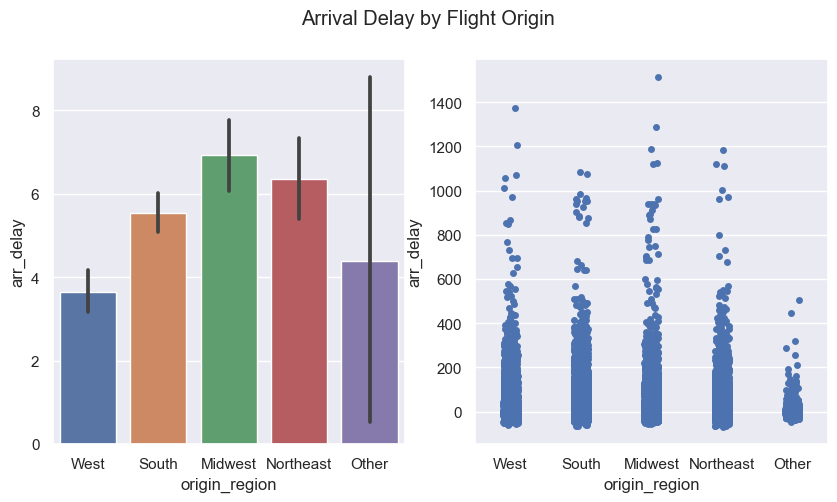

In [61]:
target_rel(df_flights, feature='origin_region', feature_title='Flight Origin')

In [62]:
target_rel(df_flights, feature='dest_region', feature_title='Destination Region')

### Flight Type and Arr_Delay

In [63]:
# look at relationship between flight type and arr_delay

df_flights['haul'] = pd.cut(df_flights['distance'], bins = [0,800,2200,5000],labels=['short','medium','long'])
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... is_holiday  crs_dep_time_hour  \
0              12889    LAS  ...       True               19.0   
1              12889    LAS  ...       True               21.0   
2              12889    LAS  ...       True                6.0   
3              12889    LAS  ...       True                7.0   
4              12889    LAS  ...       True               17.0   

  crs_dep_time_of_day crs_arr_time_hour crs_arr_time_of_day origin_state  \
0      late afternoon              23.0             evening           NV   
1             evening              15.0              midday           NV   
2        late morning              11.0              midday           NV   
3        late morning               8.0        late morning           NV   
4      late afternoon              18.0      late afternoon           NV   

  dest_state  origin_region  dest_region    haul  
0         OK           West        South  medium  
1         NE           West      Midwest  medium  
2         NE           West      Midwest  medium  
3         CA           West         West   short  
4         CA           West         West   short  

[5 rows x 39 columns]

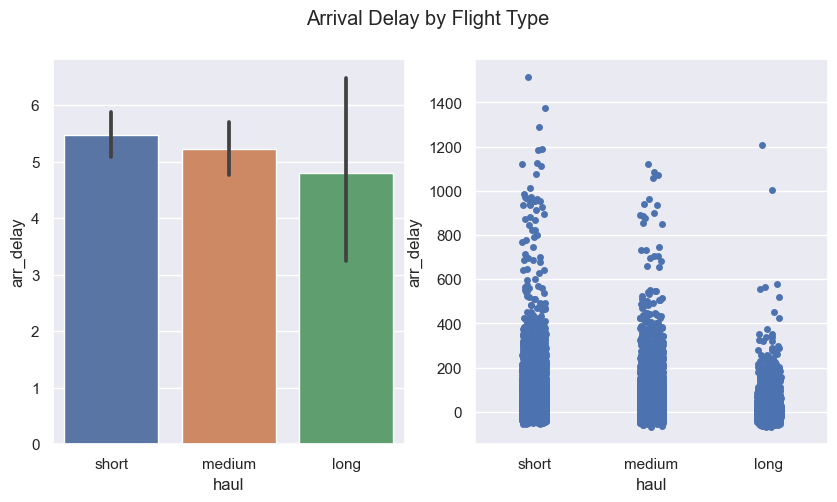

In [64]:
target_rel(df_flights, feature='haul', feature_title='Flight Type')

In [65]:
# drop unneeded features

# df_flights = df_flights.drop(columns=['fl_date','dup','flights','mkt_carrier','mkt_carrier_fl_num','tail_num','op_carrier_fl_num','origin_airport_id','origin','origin_city_name','dest_airport_id','dest','dest_city_name','crs_dep_time','crs_arr_time'])

In [66]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data, flight_data_file)

# Round 2

### Origin Airport Mean/Median Arrival Delay and Arr_Delay

In [67]:
# get the cleaned dataset

import pickle

with open(r'..\data\flight_data_engineered.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [68]:
filter_df = df_flights[['origin_airport_id','arr_delay','origin_city_name']]
mean_airport_delay = filter_df.groupby('origin_airport_id', as_index=False).agg(mean_airport_delay = ('arr_delay','mean')).sort_values(by='mean_airport_delay', ascending=False)
mean_airport_delay.set_index('origin_airport_id',inplace=True)
mean_airport_delay = mean_airport_delay.T
mean_airport_delay.head()

origin_airport_id        11447       13832       15454      11980      10361  \
mean_airport_delay  135.222222  124.833333  105.166667  79.888889  70.666667   

origin_airport_id       10967      10728      13034   11027      11587  ...  \
mean_airport_delay  60.777778  53.666667  41.857143  40.125  37.555556  ...   

origin_airport_id   12129      10558      10631  10643  10141      15074  \
mean_airport_delay  -13.5 -13.666667 -13.714286  -14.0 -15.25 -15.363636   

origin_airport_id       10739  12335  15841  10409  
mean_airport_delay -16.857143  -20.8  -22.0  -24.0  

[1 rows x 367 columns]

In [69]:
airport_dict = mean_airport_delay.to_dict('records')

In [70]:
airport_dict

[{11447: 135.22222222222223,
  13832: 124.83333333333333,
  15454: 105.16666666666667,
  11980: 79.88888888888889,
  10361: 70.66666666666667,
  10967: 60.77777777777778,
  10728: 53.666666666666664,
  13034: 41.857142857142854,
  11027: 40.125,
  11587: 37.55555555555556,
  15582: 36.55555555555556,
  11122: 32.166666666666664,
  13964: 31.75,
  15070: 30.97142857142857,
  10685: 29.86842105263158,
  13829: 29.666666666666668,
  14321: 28.239520958083833,
  13459: 23.7,
  13121: 22.333333333333332,
  12884: 21.846153846153847,
  10747: 21.576923076923077,
  10154: 21.5,
  11865: 21.142857142857142,
  15008: 21.0,
  12544: 20.96153846153846,
  14633: 20.714285714285715,
  11470: 20.65,
  12519: 20.307692307692307,
  11092: 20.285714285714285,
  14696: 18.853932584269664,
  11503: 18.83783783783784,
  16101: 18.636363636363637,
  13933: 18.526315789473685,
  14716: 17.705882352941178,
  11637: 17.263736263736263,
  11111: 16.102564102564102,
  11076: 16.0,
  11013: 16.0,
  11778: 15.95,

In [71]:
df_flights['mean_origin_airport_delay'] = df_flights['origin_airport_id'].map(airport_dict[0])

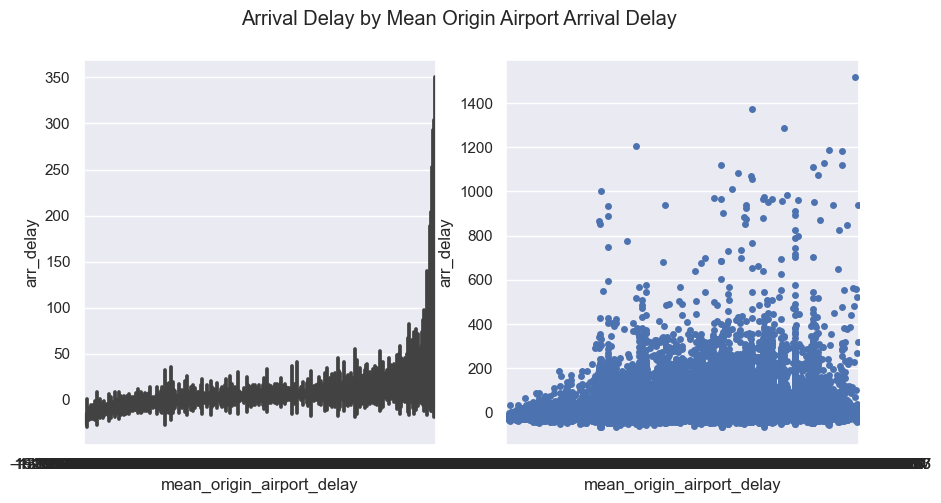

In [72]:
target_rel(df_flights, feature='mean_origin_airport_delay', feature_title='Mean Origin Airport Arrival Delay')

arr_delay  mean_origin_airport_delay
0   2.944439                   1.724949
1   3.828641                   1.724949
4   3.610918                   1.724949
5   2.708050                   1.724949
6   3.367296                   1.724949

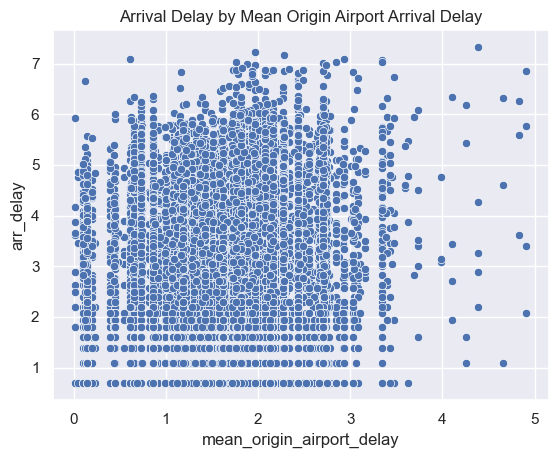

In [96]:
to_plot = df_flights[(df_flights['arr_delay']>1)&(df_flights['mean_origin_airport_delay']>1)]
to_plot = np.log(to_plot[['arr_delay','mean_origin_airport_delay']])

g = sns.scatterplot(data=to_plot, x='mean_origin_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Origin Airport Arrival Delay')
to_plot.head()

In [97]:
df_flights['arr_delay'].corr(df_flights['mean_origin_airport_delay'])

0.10079671185315345

In [74]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['origin_airport_mean_speed'] = pd.qcut(df_flights['mean_origin_airport_delay'], 4, labels=cut_labels)

In [75]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... crs_dep_time_of_day  crs_arr_time_hour  \
0              12889    LAS  ...      late afternoon               23.0   
1              12889    LAS  ...             evening               15.0   
2              12889    LAS  ...        late morning               11.0   
3              12889    LAS  ...        late morning                8.0   
4              12889    LAS  ...      late afternoon               18.0   

  crs_arr_time_of_day origin_state dest_state origin_region dest_region  \
0             evening           NV         OK          West       South   
1              midday           NV         NE          West     Midwest   
2              midday           NV         NE          West     Midwest   
3        late morning           NV         CA          West        West   
4      late afternoon           NV         CA          West        West   

     haul  mean_origin_airport_delay  origin_airport_mean_speed  
0  medium                   5.612236                medium-fast  
1  medium                   5.612236                medium-fast  
2  medium                   5.612236                medium-fast  
3   short                   5.612236                medium-fast  
4   short                   5.612236                medium-fast  

[5 rows x 41 columns]

In [76]:
target_rel(df_flights, feature='origin_airport_mean_speed', feature_title='Origin Airport Speed (Mean)')

In [77]:
filter_df = df_flights[['origin_airport_id','arr_delay','origin_city_name']]
median_airport_delay = filter_df.groupby('origin_airport_id', as_index=False).agg(median_airport_delay = ('arr_delay','median')).sort_values(by='median_airport_delay', ascending=False)
median_airport_delay.set_index('origin_airport_id',inplace=True)
median_airport_delay = median_airport_delay.T
median_airport_delay.head()

origin_airport_id     13829  10728  13832  14237  14905  15008  12250  11470  \
median_airport_delay   36.0   23.0   13.5   12.0   11.0   11.0   10.0    9.5   

origin_airport_id     11699  13459  ...  15074  11076  11577  11905  12335  \
median_airport_delay    8.5    8.0  ...  -17.0  -17.0  -17.0  -17.0  -18.0   

origin_airport_id     14520  12365  10739  15841  10409  
median_airport_delay  -19.0  -20.0  -21.0  -22.0  -24.0  

[1 rows x 367 columns]

In [78]:
airport_dict = median_airport_delay.to_dict('records')

In [79]:
airport_dict

[{13829: 36.0,
  10728: 23.0,
  13832: 13.5,
  14237: 12.0,
  14905: 11.0,
  15008: 11.0,
  12250: 10.0,
  11470: 9.5,
  11699: 8.5,
  13459: 8.0,
  13964: 8.0,
  12265: 7.0,
  14231: 5.0,
  13347: 4.5,
  11867: 4.0,
  13933: 4.0,
  13034: 3.0,
  12902: 3.0,
  10245: 2.0,
  10918: 1.0,
  11067: 1.0,
  11503: 1.0,
  12544: 1.0,
  10676: 0.0,
  10275: 0.0,
  13121: 0.0,
  14716: 0.0,
  16101: 0.0,
  10926: 0.0,
  15454: -0.5,
  10154: -0.5,
  13541: -0.5,
  12511: -1.0,
  14303: -1.0,
  11092: -1.0,
  12255: -1.5,
  12884: -1.5,
  12917: -2.0,
  12899: -2.0,
  10779: -2.0,
  14582: -2.5,
  11618: -3.0,
  14489: -3.0,
  14314: -3.0,
  11445: -3.0,
  11259: -3.0,
  11298: -3.0,
  11274: -3.0,
  13486: -3.0,
  15023: -3.0,
  11778: -3.5,
  14877: -3.5,
  11413: -4.0,
  15024: -4.0,
  12173: -4.0,
  11057: -4.0,
  11648: -4.0,
  15027: -4.0,
  15016: -4.0,
  12177: -4.0,
  11525: -4.0,
  13970: -4.0,
  10821: -4.0,
  13830: -4.0,
  13303: -4.0,
  13232: -4.0,
  13873: -4.0,
  14108: -4.0,
  

In [80]:
df_flights['median_origin_airport_delay'] = df_flights['origin_airport_id'].map(airport_dict[0])

In [86]:
df_flights['median_origin_airport_delay'].describe()

count    98363.000000
mean        -6.251568
std          2.219766
min        -24.000000
25%         -7.500000
50%         -6.000000
75%         -5.000000
max         36.000000
Name: median_origin_airport_delay, dtype: float64

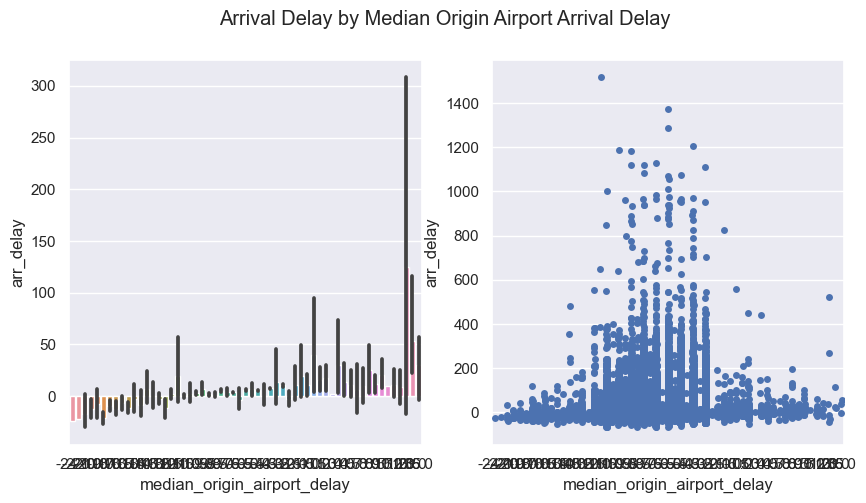

In [81]:
target_rel(df_flights, feature='median_origin_airport_delay', feature_title='Median Origin Airport Arrival Delay')

Text(0.5, 1.0, 'Arrival Delay by Median Origin Airport Arrival Delay')

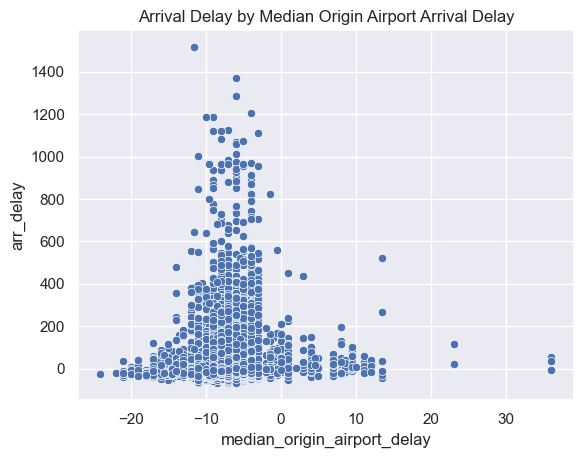

In [82]:
g = sns.scatterplot(data=df_flights, x='median_origin_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Median Origin Airport Arrival Delay')

In [98]:
df_flights['arr_delay'].corr(df_flights['median_origin_airport_delay'])

0.04733177145733161

In [84]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['origin_airport_median_speed'] = pd.qcut(df_flights['median_origin_airport_delay'], 4, labels=cut_labels)

In [85]:
target_rel(df_flights, feature='origin_airport_median_speed', feature_title='Origin Airport Speed (Median)')

In [ ]:
df_flights['median_origin_airport_delay'].describe()

count    98363.000000
mean        -6.251568
std          2.219766
min        -24.000000
25%         -7.500000
50%         -6.000000
75%         -5.000000
max         36.000000
Name: median_origin_airport_delay, dtype: float64

In [87]:
df_flights[['median_origin_airport_delay','origin_airport_median_speed','mean_origin_airport_delay','origin_airport_mean_speed','origin_city_name']].head(50)

median_origin_airport_delay origin_airport_median_speed  \
0                          -4.0                        slow   
1                          -4.0                        slow   
2                          -4.0                        slow   
3                          -4.0                        slow   
4                          -4.0                        slow   
5                          -4.0                        slow   
6                          -4.0                        slow   
7                          -4.0                        slow   
9                          -4.0                        slow   
10                         -4.0                        slow   
11                         -4.0                        slow   
12                         -4.0                        slow   
13                         -4.0                        slow   
14                         -4.0                        slow   
15                         -4.0                        slow   
16                         -4.0                        slow   
17                         -4.0                        slow   
18                         -4.0                        slow   
19                         -4.0                        slow   
20                         -4.0                        slow   
21                         -4.0                        slow   
22                         -4.0                        slow   
23                         -4.0                        slow   
25                         -4.0                        slow   
26                         -4.0                        slow   
27                         -4.0                        slow   
28                         -4.0                        slow   
29                         -3.0                        slow   
30                         -7.0                 medium-fast   
31                         -4.0                        slow   
32                         -3.0                        slow   
33                          1.0                        slow   
34                         -4.0                        slow   
35                         -4.0                        slow   
36                         -3.0                        slow   
37                         -3.0                        slow   
38                         -5.0                 medium-slow   
39                         -3.0                        slow   
40                         -7.0                 medium-fast   
41                         -6.0                 medium-fast   
42                         -4.0                        slow   
43                         -4.0                        slow   
44                         -6.0                 medium-fast   
45                         -4.0                        slow   
46                         -7.0                 medium-fast   
47                         -4.0                        slow   
48                         -4.0                        slow   
49                         -5.0                 medium-slow   
50                         -4.0                        slow   
51                         -3.0                        slow   

    mean_origin_airport_delay origin_airport_mean_speed       origin_city_name  
0                    5.612236               medium-fast          Las Vegas, NV  
1                    5.612236               medium-fast          Las Vegas, NV  
2                    5.612236               medium-fast          Las Vegas, NV  
3                    5.612236               medium-fast          Las Vegas, NV  
4                    5.612236               medium-fast          Las Vegas, NV  
5                    5.612236               medium-fast          Las Vegas, NV  
6                    5.612236               medium-fast          Las Vegas, NV  
7                    5.612236               medium-fast          Las Vegas, NV  
9                    5.612236               medium-fast      

In [99]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... crs_arr_time_of_day  origin_state dest_state  \
0              12889    LAS  ...             evening            NV         OK   
1              12889    LAS  ...              midday            NV         NE   
2              12889    LAS  ...              midday            NV         NE   
3              12889    LAS  ...        late morning            NV         CA   
4              12889    LAS  ...      late afternoon            NV         CA   

  origin_region dest_region    haul mean_origin_airport_delay  \
0          West       South  medium                  5.612236   
1          West     Midwest  medium                  5.612236   
2          West     Midwest  medium                  5.612236   
3          West        West   short                  5.612236   
4          West        West   short                  5.612236   

   origin_airport_mean_speed  median_origin_airport_delay  \
0                medium-fast                         -4.0   
1                medium-fast                         -4.0   
2                medium-fast                         -4.0   
3                medium-fast                         -4.0   
4                medium-fast                         -4.0   

   origin_airport_median_speed  
0                         slow  
1                         slow  
2                         slow  
3                         slow  
4                         slow  

[5 rows x 43 columns]

In [100]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed'],
      dtype='object')

### Destination Airport Mean Arrival Delay and Arr_Delay

In [101]:
filter_df = df_flights[['dest_airport_id','arr_delay','origin_city_name']]
mean_airport_delay = filter_df.groupby('dest_airport_id', as_index=False).agg(mean_airport_delay = ('arr_delay','mean')).sort_values(by='mean_airport_delay', ascending=False)
mean_airport_delay.set_index('dest_airport_id',inplace=True)
mean_airport_delay = mean_airport_delay.T
mean_airport_delay.head()

dest_airport_id     15454  11027  12119  13964  10361      16101  15582  \
mean_airport_delay   89.5   79.6   53.0   36.5   35.9  34.363636   33.5   

dest_airport_id         11823  11587      12223  ...  12129      10333  \
mean_airport_delay  33.485981   32.0  31.652174  ... -14.75 -14.777778   

dest_airport_id         11525   14802  10754  10409  10165  14256  11336  \
mean_airport_delay -16.666667 -16.875  -18.0  -21.0  -21.0  -22.0  -23.0   

dest_airport_id     16869  
mean_airport_delay  -26.5  

[1 rows x 370 columns]

In [102]:
airport_dict = mean_airport_delay.to_dict('records')

In [103]:
airport_dict

[{15454: 89.5,
  11027: 79.6,
  12119: 53.0,
  13964: 36.5,
  10361: 35.9,
  16101: 34.36363636363637,
  15582: 33.5,
  11823: 33.48598130841121,
  11587: 32.0,
  12223: 31.652173913043477,
  13832: 30.77777777777778,
  11447: 28.77777777777778,
  14254: 28.0,
  13388: 24.6,
  11471: 24.333333333333332,
  15070: 24.044444444444444,
  14952: 24.0,
  12007: 22.894736842105264,
  13367: 22.234567901234566,
  13344: 22.2,
  12250: 22.0,
  15027: 21.0,
  10136: 20.958333333333332,
  12898: 20.714285714285715,
  11618: 19.506721820062047,
  10431: 19.321739130434782,
  11109: 18.94927536231884,
  14524: 18.322683706070286,
  14711: 18.321428571428573,
  11503: 18.294117647058822,
  11445: 18.0,
  13121: 17.875,
  15048: 17.692307692307693,
  11315: 17.0,
  10874: 16.32941176470588,
  14321: 15.883435582822086,
  10967: 15.857142857142858,
  14633: 15.796296296296296,
  14761: 15.721649484536082,
  13459: 15.55,
  12094: 15.529411764705882,
  10620: 15.121621621621621,
  13256: 14.74626865671

In [104]:
df_flights['mean_dest_airport_delay'] = df_flights['dest_airport_id'].map(airport_dict[0])

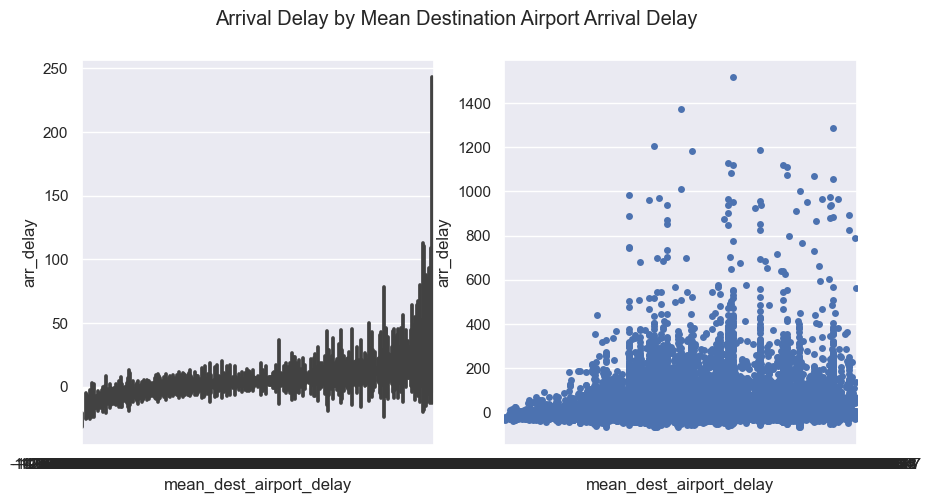

In [105]:
target_rel(df_flights, feature='mean_dest_airport_delay', feature_title='Mean Destination Airport Arrival Delay')

In [106]:
g = sns.scatterplot(data=df_flights, x='mean_dest_airport_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Destination Airport Arrival Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Destination Airport Arrival Delay')

In [107]:
df_flights['arr_delay'].corr(df_flights['mean_dest_airport_delay'])

0.09370001565254643

In [108]:
cut_labels = ['fast','medium-fast','medium-slow','slow']
df_flights['dest_airport_mean_speed'] = pd.qcut(df_flights['mean_dest_airport_delay'], 4, labels=cut_labels)

In [109]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0 2018-01-01                 WN                 WN          WN   
1 2018-01-01                 WN                 WN          WN   
2 2018-01-01                 WN                 WN          WN   
3 2018-01-01                 WN                 WN          WN   
4 2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... dest_state  origin_region dest_region  \
0              12889    LAS  ...         OK           West       South   
1              12889    LAS  ...         NE           West     Midwest   
2              12889    LAS  ...         NE           West     Midwest   
3              12889    LAS  ...         CA           West        West   
4              12889    LAS  ...         CA           West        West   

     haul mean_origin_airport_delay origin_airport_mean_speed  \
0  medium                  5.612236               medium-fast   
1  medium                  5.612236               medium-fast   
2  medium                  5.612236               medium-fast   
3   short                  5.612236               medium-fast   
4   short                  5.612236               medium-fast   

  median_origin_airport_delay  origin_airport_median_speed  \
0                        -4.0                         slow   
1                        -4.0                         slow   
2                        -4.0                         slow   
3                        -4.0                         slow   
4                        -4.0                         slow   

   mean_dest_airport_delay  dest_airport_mean_speed  
0                11.409396                     slow  
1                 6.584570              medium-slow  
2                 6.584570              medium-slow  
3                 4.148026              medium-fast  
4                 4.148026              medium-fast  

[5 rows x 45 columns]

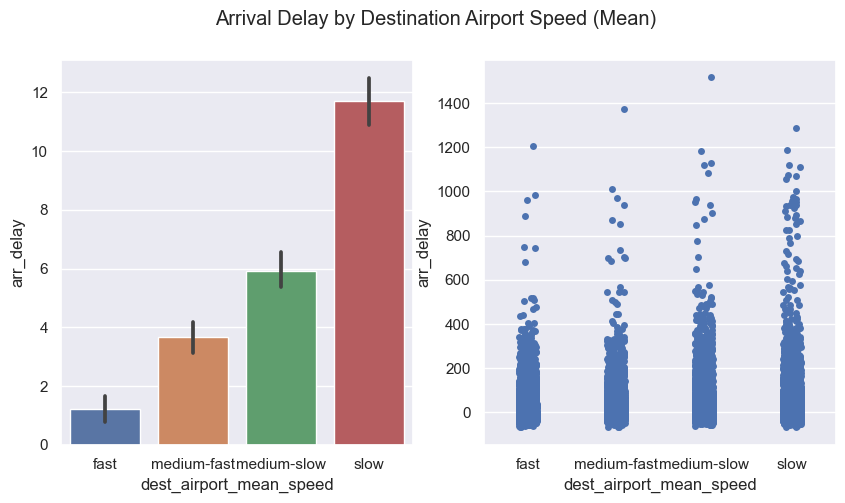

In [110]:
target_rel(df_flights, feature='dest_airport_mean_speed', feature_title='Destination Airport Speed (Mean)')

In [113]:
df_flights[['dest_city_name','dest_airport_mean_speed','mean_dest_airport_delay']].head(20)

dest_city_name dest_airport_mean_speed  mean_dest_airport_delay
0   Oklahoma City, OK                    slow                11.409396
1           Omaha, NE             medium-slow                 6.584570
2           Omaha, NE             medium-slow                 6.584570
3         Ontario, CA             medium-fast                 4.148026
4         Ontario, CA             medium-fast                 4.148026
5         Ontario, CA             medium-fast                 4.148026
6         Ontario, CA             medium-fast                 4.148026
7        Portland, OR                    fast                -0.467444
9        Portland, OR                    fast                -0.467444
10       Portland, OR                    fast                -0.467444
11   Philadelphia, PA             medium-slow                 6.001116
12        Phoenix, AZ             medium-fast                 4.141850
13        Phoenix, AZ             medium-fast                 4.141850
14        Phoenix, AZ             medium-fast                 4.141850
15        Phoenix, AZ             medium-fast                 4.141850
16        Phoenix, AZ             medium-fast                 4.141850
17        Phoenix, AZ             medium-fast                 4.141850
18        Phoenix, AZ             medium-fast                 4.141850
19        Phoenix, AZ             medium-fast                 4.141850
20        Phoenix, AZ             medium-fast                 4.141850

In [115]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed', 'mean_dest_airport_delay',
       'dest_airport_mean_speed'],
      dtype='object')

In [122]:
compare = df_flights[df_flights['mkt_unique_carrier']==df_flights['op_unique_carrier']]

In [123]:
compare.shape

(62234, 45)

In [124]:
# mkt_unique_carrier and op_unique_carrier are often the same value, so drop one to reduce noise

In [125]:
df_flights[['mkt_unique_carrier','op_unique_carrier']].head(10)

mkt_unique_carrier op_unique_carrier
0                  WN                WN
1                  WN                WN
2                  WN                WN
3                  WN                WN
4                  WN                WN
5                  WN                WN
6                  WN                WN
7                  WN                WN
9                  WN                WN
10                 WN                WN

In [126]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'year', 'month', 'day', 'mean_arr_delay',
       'median_arr_delay', 'season', 'day_of_week', 'is_weekend', 'is_holiday',
       'crs_dep_time_hour', 'crs_dep_time_of_day', 'crs_arr_time_hour',
       'crs_arr_time_of_day', 'origin_state', 'dest_state', 'origin_region',
       'dest_region', 'haul', 'mean_origin_airport_delay',
       'origin_airport_mean_speed', 'median_origin_airport_delay',
       'origin_airport_median_speed', 'mean_dest_airport_delay',
       'dest_airport_mean_speed'],
      dtype='object')

In [127]:
# drop features

df_flights = df_flights.drop(columns=[
    'fl_date',
    'mkt_unique_carrier',
    'branded_code_share',
    'mkt_carrier',
    'mkt_carrier_fl_num',
    'tail_num',
    'op_carrier_fl_num',
    'origin_airport_id',
    'origin',
    'origin_city_name',
    'dest_airport_id',
    'dest',
    'dest_city_name',
    'crs_dep_time',
    'crs_arr_time',
    'dup',
    'flights',
    'distance',
    'year',
    'month',
    'day',
    'median_arr_delay',
    'crs_dep_time_hour',
    'crs_arr_time_hour',
    'origin_state', 
    'dest_state',
    'origin_airport_mean_speed',
    'median_origin_airport_delay',
    'origin_airport_median_speed',
    'dest_airport_mean_speed'
    ])

In [129]:
df_flights.shape

(98363, 15)

In [130]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data2 = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered2.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data2, flight_data_file)

# Round 3

### Flight Number and Arr_Delay

In [219]:
# get the cleaned dataset

import pickle

with open(r'..\data\flight_data.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [220]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 WN                 WN          WN   
1  2018-01-01                 WN                 WN          WN   
2  2018-01-01                 WN                 WN          WN   
3  2018-01-01                 WN                 WN          WN   
4  2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... arr_time  arr_delay cancelled diverted  dup  \
0              12889    LAS  ...      9.0       19.0         0        0    N   
1              12889    LAS  ...    241.0       46.0         0        0    N   
2              12889    LAS  ...   1111.0       -9.0         0        0    N   
3              12889    LAS  ...    827.0       -3.0         0        0    N   
4              12889    LAS  ...   1912.0       37.0         0        0    N   

   crs_elapsed_time  actual_elapsed_time  air_time  flights  distance  
0               140                124.0     112.0        1       986  
1               150                161.0     142.0        1      1099  
2               150                145.0     132.0        1      1099  
3                55                 50.0      34.0        1       197  
4                55                 51.0      34.0        1       197  

[5 rows x 32 columns]

In [221]:
# are the same flight numbers used repeatedly for the same routes? Are the same flights consistently delayed?

# maybe try getting the average delay per carrier flight number using a larger random sample of the data?

In [222]:
filter_df = df_flights[['fl_date','op_unique_carrier','mkt_unique_carrier','op_carrier_fl_num','mkt_carrier_fl_num','crs_dep_time','arr_delay','origin_city_name','dest_city_name']].sort_values(['op_carrier_fl_num','op_unique_carrier'])
filter_df.head(10)

fl_date op_unique_carrier mkt_unique_carrier  op_carrier_fl_num  \
36262   2018-06-06                AA                 AA                  1   
61745   2019-01-14                AA                 AA                  1   
82189   2018-07-27                AA                 AA                  1   
87804   2019-04-05                AA                 AA                  1   
20271   2019-06-17                AS                 AS                  1   
33579   2019-02-16                AS                 AS                  1   
86258   2019-05-23                AS                 AS                  1   
92043   2019-03-02                AS                 AS                  1   
100753  2019-07-30                AS                 AS                  1   
8182    2018-08-28                B6                 B6                  1   

        mkt_carrier_fl_num  crs_dep_time  arr_delay origin_city_name  \
36262                    1           800      -47.0     New York, NY   
61745                    1           800        0.0     New York, NY   
82189                    1           800       35.0     New York, NY   
87804                    1           800      -34.0     New York, NY   
20271                    1           800       -4.0   Washington, DC   
33579                    1           800      -44.0   Washington, DC   
86258                    1           800       29.0   Washington, DC   
92043                    1           800      -20.0   Washington, DC   
100753                   1           800       -9.0   Washington, DC   
8182                     1          1058      -38.0     New York, NY   

             dest_city_name  
36262       Los Angeles, CA  
61745       Los Angeles, CA  
82189       Los Angeles, CA  
87804       Los Angeles, CA  
20271           Seattle, WA  
33579           Seattle, WA  
86258           Seattle, WA  
92043           Seattle, WA  
100753          Seattle, WA  
8182    Fort Lauderdale, FL

In [223]:
df_flights['carrier_fl_num'] =  df_flights['op_unique_carrier'] + df_flights['op_carrier_fl_num'].astype(str)

In [224]:
df_flights['carrier_fl_num']

0         WN5431
1          WN989
2         WN1664
3         WN1106
4         WN1559
5         WN1683
6         WN6083
7          WN495
8         WN5488
9         WN6078
10        WN6141
11        WN5937
12         WN104
13         WN582
14         WN959
15         WN987
16        WN1033
17        WN1079
18        WN1093
19        WN1110
20        WN1224
21        WN1446
22        WN1944
23         WN242
24        WN6445
25        WN6120
26         WN213
27         WN215
28        YV5763
29        AA2329
30        AA2330
31        AA2331
32        AA2333
33        AA2333
34        AA2334
35        AA2335
36        AA2336
37        AA2337
38        AA2338
39        AA2339
40        AA2341
41        AA2342
42        AA2343
43        AA2344
44        AA2345
45        AA2346
46        AA2347
47        AA2347
48        AA2349
49        AA2351
50        AA2351
51        AA2352
52        AA2352
53        AA2353
54        AA2353
55        PT4941
56        PT4945
57        PT4945
58        PT49

In [225]:
# look at relationship between departure time of day and arr_delay

# df_flights['crs_dep_time'] = df_flights['crs_dep_time'].astype(int)

In [226]:
df_flights['crs_dep_time'] = pd.to_datetime(df_flights['crs_dep_time'], format = '%H%M', errors = 'coerce')

In [227]:
df_flights['crs_dep_time_hour'] = df_flights['crs_dep_time'].dt.hour

In [228]:
cut_labels_5 = ['early morning', 'late morning', 'midday', 'late afternoon', 'evening']
cut_bins = [1, 5, 10, 15, 20, 24]
df_flights['crs_dep_time_of_day'] = pd.cut(df_flights['crs_dep_time_hour'], bins=cut_bins, labels=cut_labels_5)

In [247]:
df_flights['carrier_fl_num_TOD'] = df_flights['carrier_fl_num'] + '-' + df_flights['crs_dep_time_of_day'].astype(str)

In [248]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 WN                 WN          WN   
1  2018-01-01                 WN                 WN          WN   
2  2018-01-01                 WN                 WN          WN   
3  2018-01-01                 WN                 WN          WN   
4  2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... dup  crs_elapsed_time actual_elapsed_time  \
0              12889    LAS  ...   N               140               124.0   
1              12889    LAS  ...   N               150               161.0   
2              12889    LAS  ...   N               150               145.0   
3              12889    LAS  ...   N                55                50.0   
4              12889    LAS  ...   N                55                51.0   

  air_time flights  distance  carrier_fl_num  crs_dep_time_hour  \
0    112.0       1       986          WN5431               19.0   
1    142.0       1      1099           WN989               21.0   
2    132.0       1      1099          WN1664                6.0   
3     34.0       1       197          WN1106                7.0   
4     34.0       1       197          WN1559               17.0   

   crs_dep_time_of_day     carrier_fl_num_TOD  
0       late afternoon  WN5431-late afternoon  
1              evening          WN989-evening  
2         late morning    WN1664-late morning  
3         late morning    WN1106-late morning  
4       late afternoon  WN1559-late afternoon  

[5 rows x 36 columns]

In [249]:
filter_df = df_flights[['carrier_fl_num_TOD','arr_delay']]
filter_df.head()

carrier_fl_num_TOD  arr_delay
0  WN5431-late afternoon       19.0
1          WN989-evening       46.0
2    WN1664-late morning       -9.0
3    WN1106-late morning       -3.0
4  WN1559-late afternoon       37.0

In [250]:
mean_flight_num_delay = filter_df.groupby('carrier_fl_num_TOD', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='carrier_fl_num_TOD')

In [251]:
mean_flight_num_delay.head()

carrier_fl_num_TOD  mean_arr_delay
0  9E3280-late afternoon       -7.333333
1    9E3280-late morning       54.000000
2          9E3280-midday      -10.000000
3  9E3281-late afternoon       16.500000
4    9E3281-late morning       -3.500000

In [252]:
# mean_flight_num_delay = filter_df.groupby(['carrier_fl_num','crs_dep_time_of_day']).agg(mean_arr_delay = ('arr_delay','mean'))
# mean_flight_num_delay.head(10)

In [233]:
# mean_flight_num_delay = mean_flight_num_delay.reset_index()

In [234]:
# mean_flight_num_delay.head()

carrier_fl_num crs_dep_time_of_day  mean_arr_delay
0         9E3280       early morning             NaN
1         9E3280        late morning       54.000000
2         9E3280              midday      -10.000000
3         9E3280      late afternoon       -7.333333
4         9E3280             evening             NaN

In [235]:
# mean_flight_num_delay['carrier_fl_num_TOD'] = mean_flight_num_delay['carrier_fl_num'] + mean_flight_num_delay['crs_dep_time_of_day'].astype(str)

In [236]:
# mean_flight_num_delay.head()

carrier_fl_num crs_dep_time_of_day  mean_arr_delay    carrier_fl_num_TOD
0         9E3280       early morning             NaN   9E3280early morning
1         9E3280        late morning       54.000000    9E3280late morning
2         9E3280              midday      -10.000000          9E3280midday
3         9E3280      late afternoon       -7.333333  9E3280late afternoon
4         9E3280             evening             NaN         9E3280evening

In [237]:
# mean_flight_num_delay.drop(columns=['carrier_fl_num','crs_dep_time_of_day'],inplace=True)

In [253]:
mean_flight_num_delay.set_index('carrier_fl_num_TOD',inplace=True)

In [254]:
mean_flight_num_delay = mean_flight_num_delay.T

In [255]:
mean_flight_num_delay.head()

carrier_fl_num_TOD  9E3280-late afternoon  9E3280-late morning  9E3280-midday  \
mean_arr_delay                  -7.333333                 54.0          -10.0   

carrier_fl_num_TOD  9E3281-late afternoon  9E3281-late morning  9E3281-midday  \
mean_arr_delay                       16.5                 -3.5          -3.25   

carrier_fl_num_TOD  9E3282-late afternoon  9E3282-late morning  9E3282-midday  \
mean_arr_delay                      -14.5                -11.6           -0.5   

carrier_fl_num_TOD  9E3283-late afternoon  ...  ZW4876-evening  \
mean_arr_delay                  -3.666667  ...           -11.0   

carrier_fl_num_TOD  ZW4876-late afternoon  ZW4876-late morning  \
mean_arr_delay                        0.5            -1.285714   

carrier_fl_num_TOD  ZW4877-late afternoon  ZW4877-midday  \
mean_arr_delay                  57.333333      -9.833333   

carrier_fl_num_TOD  ZW4878-late afternoon  ZW4878-late morning  ZW4878-midday  \
mean_arr_delay                      -28.0                -14.0     -22.333333   

carrier_fl_num_TOD  ZW4879-late afternoon  ZW4879-midday  
mean_arr_delay                       11.0     -18.714286  

[1 rows x 46366 columns]

In [241]:
# mean_flight_num_delay.dropna(axis='columns',inplace=True)

In [242]:
# mean_flight_num_delay.head()

carrier_fl_num_TOD  9E3280late morning  9E3280midday  9E3280late afternoon  \
mean_arr_delay                    54.0         -10.0             -7.333333   

carrier_fl_num_TOD  9E3281late morning  9E3281midday  9E3281late afternoon  \
mean_arr_delay                    -3.5         -3.25                  16.5   

carrier_fl_num_TOD  9E3282late morning  9E3282midday  9E3282late afternoon  \
mean_arr_delay                   -11.6          -0.5                 -14.5   

carrier_fl_num_TOD  9E3283late morning  ...  ZW4876late morning  \
mean_arr_delay                    -9.0  ...           -1.285714   

carrier_fl_num_TOD  ZW4876late afternoon  ZW4876evening  ZW4877midday  \
mean_arr_delay                       0.5          -11.0     -9.833333   

carrier_fl_num_TOD  ZW4877late afternoon  ZW4878late morning  ZW4878midday  \
mean_arr_delay                 57.333333               -14.0    -22.333333   

carrier_fl_num_TOD  ZW4878late afternoon  ZW4879midday  ZW4879late afternoon  
mean_arr_delay                     -28.0    -18.714286                  11.0  

[1 rows x 46338 columns]

In [256]:
flight_dict = mean_flight_num_delay.to_dict('records')

In [257]:
flight_dict

[{'9E3280-late afternoon': -7.333333333333333,
  '9E3280-late morning': 54.0,
  '9E3280-midday': -10.0,
  '9E3281-late afternoon': 16.5,
  '9E3281-late morning': -3.5,
  '9E3281-midday': -3.25,
  '9E3282-late afternoon': -14.5,
  '9E3282-late morning': -11.6,
  '9E3282-midday': -0.5,
  '9E3283-late afternoon': -3.6666666666666665,
  '9E3283-late morning': -9.0,
  '9E3283-midday': 20.75,
  '9E3284-early morning': -11.0,
  '9E3284-evening': -21.5,
  '9E3284-late afternoon': -8.0,
  '9E3284-late morning': -4.0,
  '9E3284-midday': -14.0,
  '9E3285-evening': -15.5,
  '9E3285-late afternoon': -4.0,
  '9E3285-late morning': -7.2,
  '9E3285-midday': 276.75,
  '9E3286-late afternoon': -19.0,
  '9E3286-late morning': -11.333333333333334,
  '9E3286-midday': -15.88888888888889,
  '9E3287-late afternoon': 13.0,
  '9E3287-late morning': 27.0,
  '9E3287-midday': 1.0,
  '9E3288-evening': -10.5,
  '9E3288-late afternoon': -18.0,
  '9E3288-late morning': 4.5,
  '9E3288-midday': -4.0,
  '9E3289-evening':

In [258]:
df_flights['mean_flight_num_delay'] = df_flights['carrier_fl_num_TOD'].map(flight_dict[0])

In [259]:
df_flights.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
0  2018-01-01                 WN                 WN          WN   
1  2018-01-01                 WN                 WN          WN   
2  2018-01-01                 WN                 WN          WN   
3  2018-01-01                 WN                 WN          WN   
4  2018-01-01                 WN                 WN          WN   

   mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
0                5431                WN   N291WN               5431   
1                 989                WN   N287WN                989   
2                1664                WN   N751SW               1664   
3                1106                WN   N704SW               1106   
4                1559                WN   N423WN               1559   

   origin_airport_id origin  ... crs_elapsed_time  actual_elapsed_time  \
0              12889    LAS  ...              140                124.0   
1              12889    LAS  ...              150                161.0   
2              12889    LAS  ...              150                145.0   
3              12889    LAS  ...               55                 50.0   
4              12889    LAS  ...               55                 51.0   

  air_time flights distance  carrier_fl_num  crs_dep_time_hour  \
0    112.0       1      986          WN5431               19.0   
1    142.0       1     1099           WN989               21.0   
2    132.0       1     1099          WN1664                6.0   
3     34.0       1      197          WN1106                7.0   
4     34.0       1      197          WN1559               17.0   

   crs_dep_time_of_day     carrier_fl_num_TOD  mean_flight_num_delay  
0       late afternoon  WN5431-late afternoon              -0.666667  
1              evening          WN989-evening              46.000000  
2         late morning    WN1664-late morning              -9.000000  
3         late morning    WN1106-late morning             -14.000000  
4       late afternoon  WN1559-late afternoon              37.000000  

[5 rows x 37 columns]

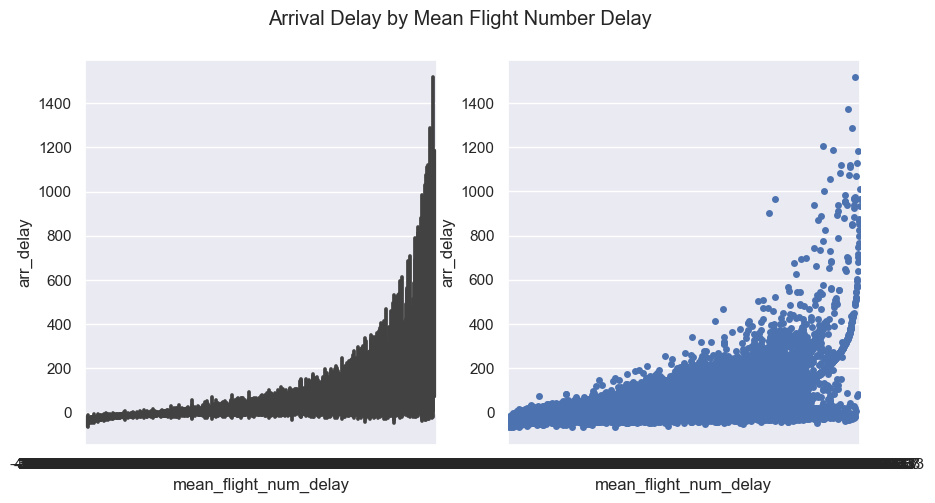

In [260]:
target_rel(df_flights, feature='mean_flight_num_delay', feature_title='Mean Flight Number Delay')

Text(0.5, 1.0, 'Arrival Delay by Mean Flight Number Delay')

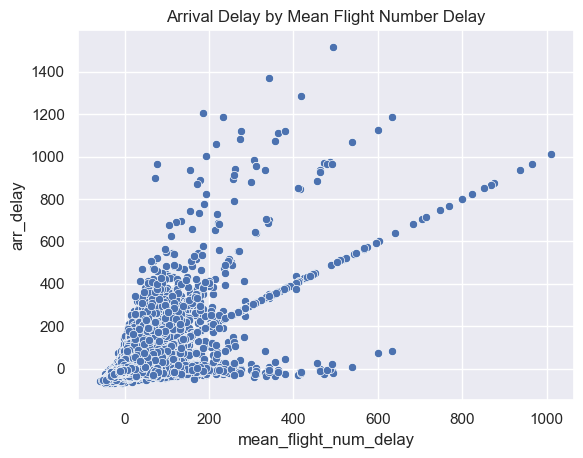

In [265]:
g = sns.scatterplot(data=df_flights, x='mean_flight_num_delay', y='arr_delay')
g.set_title('Arrival Delay by Mean Flight Number Delay')

In [266]:
df_flights['mean_flight_num_delay'].corr(df_flights['arr_delay'])

0.698285469115315

In [271]:
len(df_flights[df_flights['mean_flight_num_delay']==df_flights['arr_delay']])

23368

In [267]:
df_flights['mean_flight_num_delay'].value_counts()

-9.000000       1556
-8.000000       1497
-7.000000       1477
-10.000000      1427
-5.000000       1422
-6.000000       1422
-11.000000      1366
-12.000000      1353
-13.000000      1332
-4.000000       1217
-3.000000       1200
-14.000000      1194
-15.000000      1138
-2.000000       1092
-1.000000       1014
-16.000000       975
 0.000000        967
-17.000000       959
 1.000000        941
 2.000000        796
-18.000000       795
-19.000000       755
 3.000000        733
 4.000000        675
 7.000000        651
 5.000000        646
-20.000000       609
-8.500000        576
 8.000000        572
 6.000000        569
-21.000000       561
 9.000000        554
-7.500000        532
-22.000000       527
-10.500000       510
-3.500000        504
 10.000000       499
-6.500000        496
-9.500000        494
-4.500000        478
-12.500000       470
-11.500000       462
-13.500000       458
 11.000000       433
-5.500000        432
-2.500000        426
 12.000000       409
-1.500000    

In [272]:
df_flights['arr_delay'].describe()

count    99023.000000
mean         5.392424
std         48.508627
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

In [261]:
# drop features

df_flights = df_flights[['mean_flight_num_delay','arr_delay']]

In [268]:
df_flights.head(20)

mean_flight_num_delay  arr_delay
0               -0.666667       19.0
1               46.000000       46.0
2               -9.000000       -9.0
3              -14.000000       -3.0
4               37.000000       37.0
5               15.000000       15.0
6               29.000000       29.0
7               -8.000000        5.0
8               -8.500000        3.0
9               71.000000       71.0
10              -9.000000       -9.0
11              -1.000000      -15.0
12               3.500000       29.0
13              -2.500000        3.0
14              -8.000000       -8.0
15             -12.000000      -12.0
16             -11.000000      -17.0
17              57.000000       57.0
18             -17.000000      -16.0
19              18.000000        7.0

In [ ]:
df_flights.shape

(98363, 15)

In [264]:
# make a pickle of the feature engineered data
import pickle

#Do Some Feature Engineering
feature_engineered_data3 = df_flights

#Dump it(save it in binary format)
with open(r'..\data\flight_data_engineered3.pickle','wb') as flight_data_file:
     pickle.dump(feature_engineered_data3, flight_data_file)